In [42]:
#https://www.zybuluo.com/hanbingtao/note/476663
#手写数字识别

#数据下载
# from tensorflow.examples.tutorials.mnist import input_data
# mnist=input_data.read_data_sets('/tmp/',one_hot=True)
#或者：download:http://yann.lecun.com/exdb/mnist/

#文件路径
import os

base_path='/Users/yexianyong/Downloads/machine_learning/mnist'
training_images_path=os.path.join(base_path,'train-images-idx3-ubyte')
training_labels_path=os.path.join(base_path,'train-labels-idx1-ubyte')
test_images_path=os.path.join(base_path,'t10k-images-idx3-ubyte')
test_labels_path=os.path.join(base_path,'t10k-labels-idx1-ubyte')

training_images_path

'/Users/yexianyong/Downloads/machine_learning/mnist/train-images-idx3-ubyte'

In [43]:
#读取文件
#http://blog.csdn.net/simple_the_best/article/details/75267863
import struct
import numpy as np

def load_mnist(images_path,labels_path,kind='train'):
    """Load MNIST data from path"""
    
    with open(labels_path, 'rb') as lbpath:
        magic, n = struct.unpack('>II',lbpath.read(8))
        labels = np.fromfile(lbpath,dtype=np.uint8)

    with open(images_path, 'rb') as imgpath:
        magic, num, rows, cols = struct.unpack('>IIII',imgpath.read(16))
        images = np.fromfile(imgpath,dtype=np.uint8).reshape(len(labels), 784)

    return images, labels
images,labels=load_mnist(training_images_path,training_labels_path)
images,labels

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([5, 0, 4, ..., 5, 6, 8], dtype=uint8))

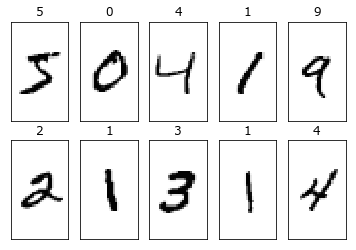

In [44]:
#可视化
import matplotlib.pyplot as plt
fig,ax=plt.subplots(nrows=2,ncols=5,sharex=True,sharey=True)

ax = ax.flatten()
for i in range(10):
    img = images[i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')
    ax[i].set_title(labels[i])
    
ax[0].set_xticks([])
ax[0].set_yticks([])

plt.show()

In [45]:
#构造训练相关数据
#给images添加bias：1

#inputs
inputs=np.zeros((images.shape[0],images.shape[1]+1))
inputs[:,0:1]=1#为数据添加bias 1
inputs[:,1:]=images[:,:] 

inputs

array([[ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.]])

In [46]:
#超参数确定
#Three layers
#input layer nodes:785个(已添加bias)
#hidden layer nodes:301个(已添加bias)
#output layer nodes:10个

#weights不能为0
w12=np.random.uniform(-0.1,0.1,(301,inputs.shape[1]))
w23=np.random.uniform(-0.1,0.1,(10,301))

#学习率
µ=0.001

w12.shape,w12,w23.shape,w23

((301, 785), array([[ 0.01524353, -0.05268317, -0.027723  , ...,  0.02173706,
         -0.06755998, -0.02175653],
        [-0.07255561,  0.02127452,  0.06401756, ..., -0.03940597,
         -0.08921993, -0.06386864],
        [-0.08341253, -0.02852453, -0.06780443, ...,  0.09225031,
          0.03620752,  0.02813027],
        ..., 
        [-0.06677289, -0.06266021,  0.04507997, ...,  0.05562985,
          0.07302608, -0.07074518],
        [-0.03480868,  0.06874986,  0.01686656, ..., -0.03064752,
         -0.07759549,  0.03821386],
        [-0.04587164, -0.04520371, -0.05894436, ..., -0.03690406,
          0.04372687, -0.08556279]]), (10,
  301), array([[ 0.03741849,  0.05426561,  0.00103951, ...,  0.08145375,
          0.04187204,  0.01915642],
        [ 0.03301249,  0.04420539,  0.06047917, ...,  0.05747373,
          0.0473347 , -0.0991093 ],
        [-0.04155836,  0.05943543,  0.03840152, ...,  0.02921616,
          0.01415352, -0.07533652],
        ..., 
        [ 0.07493748,  0.041

In [47]:
#计算
#激活函数sigmoid
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

def get_result(vec):
    max_value_index = 0
    max_value = 0
    for i in range(len(vec)):
        if vec[i] > max_value:
            max_value = vec[i]
            max_value_index = i
    return max_value_index

def softmax(vec):
    return vec/np.sum(vec)
 

for x,y in zip(inputs,labels):
    
    #计算输出值
    z2=w12.dot(x)
    a2=sigmoid(z2)
    
    z3=w23.dot(a2)
    a3=softmax(z3)
#     print('output:',a3)
    
    #反向传播
    #######################
    label=np.zeros(10)
    label[y]=1
#     print('lable:',label)
#     print('output:',get_result(a3),'label:',y)
    
    delta3=a3-label
#     print('delta3:',delta3)
    
    #更新w23
    w23=w23+µ*delta3.reshape(len(delta3),1).dot(a2.reshape(1,len(a2)))
    
    #计算a2节点误差delta2
    delta2=a2*(1-a2)*w23.T.dot(delta3)
    
    #更新w12
#     print(x.shape,w12.shape,delta2.shape)
    w12=w12+µ*delta2.reshape(len(delta2),1).dot(x.reshape(1,len(x)))
    
    #######################
    
w12,w23

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


(array([[ 0.02689572, -0.05268317, -0.027723  , ...,  0.02173706,
         -0.06755998, -0.02175653],
        [-0.07116136,  0.02127452,  0.06401756, ..., -0.03940597,
         -0.08921993, -0.06386864],
        [-0.08359671, -0.02852453, -0.06780443, ...,  0.09225031,
          0.03620752,  0.02813027],
        ..., 
        [-0.06750396, -0.06266021,  0.04507997, ...,  0.05562985,
          0.07302608, -0.07074518],
        [-0.03403969,  0.06874986,  0.01686656, ..., -0.03064752,
         -0.07759549,  0.03821386],
        [-0.04353849, -0.04520371, -0.05894436, ..., -0.03690406,
          0.04372687, -0.08556279]]),
 array([[ -2.17169617e-01,   5.80079654e-01,  -7.01686755e-02, ...,
          -3.23346586e-01,  -3.38384040e-01,   1.04498803e-01],
        [ -1.43876560e-01,   2.86699070e-01,  -7.80625121e-04, ...,
          -1.94377889e-01,  -1.52925990e-01,  -9.65991763e-02],
        [ -1.03957941e-01,   1.45932613e-01,   1.15664160e-01, ...,
          -7.14762266e-02,  -6.65888695e

In [52]:
test_images,test_labels=load_mnist(test_images_path,test_labels_path)
#数据预处理
#inputs
test_inputs=np.zeros((test_images.shape[0],test_images.shape[1]+1))
test_inputs[:,0:1]=1#为数据添加bias 1
test_inputs[:,1:]=test_images[:,:] 

error_counts=0
for x,y in zip(test_inputs,test_labels):
    
    #计算输出值
    z2=w12.dot(x)
    a2=sigmoid(z2)
    
    z3=w23.dot(a2)
    a3=softmax(z3)
    
    if int(get_result(a3))!=int(y):
        error_counts+=1
        
error_counts

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


7 7
2 2
1 1
2 0
4 4
1 1
4 4
9 9
2 5
9 9
0 0
8 6
9 9
0 0
1 1
5 5
9 9
7 7
8 3
4 4
9 9
6 6
6 6
5 5
4 4
0 0
7 7
4 4
0 0
1 1
3 3
1 1
3 3
6 4
9 7
2 2
7 7
1 1
3 2
1 1
1 1
7 7
4 4
2 2
3 3
5 5
8 1
2 2
4 4
4 4
6 6
3 3
5 5
5 5
8 6
8 0
4 4
1 1
9 9
5 5
7 7
8 8
4 9
9 3
7 7
4 4
6 6
4 4
3 3
0 0
7 7
0 0
2 2
8 9
1 1
7 7
3 3
7 2
7 9
7 7
9 7
6 6
2 2
7 7
8 8
4 4
7 7
3 3
6 6
1 1
3 3
6 6
8 9
3 3
1 1
4 4
1 1
7 7
6 6
9 9
6 6
0 0
5 5
4 4
9 9
9 9
2 2
1 1
9 9
4 4
8 8
1 7
3 3
9 9
7 7
9 4
4 4
4 4
9 9
8 2
5 5
6 4
7 7
6 6
7 7
9 9
2 0
5 5
8 8
5 5
6 6
6 6
5 5
8 7
8 8
1 1
0 0
1 1
6 6
9 4
6 6
7 7
3 3
1 1
9 7
1 1
8 8
2 2
0 0
9 2
9 9
9 9
9 5
5 5
1 1
5 5
6 6
0 0
3 3
9 4
4 4
6 6
5 5
4 4
6 6
5 5
4 4
8 5
1 1
4 4
4 4
7 7
2 2
3 3
2 2
8 7
1 1
8 8
1 1
8 8
1 1
8 8
5 5
0 0
8 8
9 9
2 2
5 5
0 0
1 1
1 1
8 1
0 0
4 9
0 0
2 3
1 1
6 6
4 4
2 2
8 3
6 6
1 1
1 1
1 1
3 3
9 9
5 5
2 2
9 9
4 4
7 5
9 9
3 3
9 9
5 0
3 3
5 6
7 5
5 5
9 7
2 2
8 2
7 7
1 1
2 2
8 8
9 4
1 1
7 7
3 3
3 3
8 8
7 8
9 7
9 9
2 2
2 2
4 4
1 1
5 5
8 9
8 8
9 7
2 2
8 3
0 0
4 4
4 4
2 2


8 8
4 4
9 7
0 0
6 6
0 2
8 8
5 5
2 2
8 8
5 5
7 7
5 3
0 0
5 8
2 2
4 3
8 2
8 8
2 2
5 5
5 5
0 7
5 6
4 4
5 6
8 8
4 4
8 8
2 2
7 7
4 4
9 5
2 2
0 0
3 3
8 9
9 4
9 6
7 7
2 2
5 5
1 6
1 1
1 1
8 2
3 3
8 6
7 7
8 8
7 7
6 6
4 4
8 8
9 9
9 4
8 8
6 6
5 3
8 8
3 3
1 1
0 0
6 6
2 2
2 2
9 5
6 6
9 9
5 5
8 8
1 1
4 4
1 1
7 7
8 8
4 4
6 6
1 1
8 8
4 4
3 3
1 1
2 2
8 8
0 0
8 8
5 5
9 9
2 1
4 4
2 2
5 0
3 2
7 7
7 0
1 9
5 0
2 2
5 5
7 7
6 6
7 7
9 9
9 4
8 2
8 6
2 2
4 4
4 4
8 8
5 0
9 4
4 4
5 5
8 8
0 0
6 6
8 8
9 9
8 8
5 5
6 6
9 9
0 0
9 4
8 8
7 7
1 1
5 3
4 4
6 5
8 8
0 0
9 9
1 1
9 3
3 3
6 6
9 9
8 8
9 7
1 1
0 0
5 5
9 7
1 1
7 7
5 5
8 2
7 7
9 9
1 1
8 8
5 5
2 2
4 4
9 9
4 4
7 7
2 2
2 2
3 3
4 4
9 9
1 1
9 9
2 2
1 1
7 7
9 9
4 4
4 4
6 1
6 6
5 7
1 2
7 7
8 8
0 8
1 1
9 9
7 7
1 1
1 1
7 7
5 5
3 3
3 3
5 5
1 1
3 3
7 7
6 6
1 1
3 3
9 8
7 7
5 5
9 9
6 9
0 0
0 0
2 2
8 8
8 8
8 2
8 3
7 7
1 1
3 3
0 0
8 3
4 4
4 4
5 3
8 8
9 9
2 2
3 3
9 9
7 7
1 1
1 1
7 7
0 0
6 4
4 9
6 6
8 5
9 9
1 1
8 7
0 0
2 2
0 0
0 0
4 4
6 6
7 7
0 0
7 7
1 1
4 4
6 6
9 4
8 5
4 4
9 9
7 9


2 2
1 1
1 1
1 1
1 1
4 4
4 2
9 9
7 7
6 2
5 5
1 1
1 1
8 2
1 1
9 9
9 9
9 9
1 1
0 0
7 2
0 0
2 2
1 1
1 1
4 4
6 6
9 4
1 1
5 5
4 4
9 9
9 7
7 7
8 1
5 5
6 6
2 2
2 2
2 2
8 8
0 0
6 6
9 9
5 6
5 1
9 9
9 7
7 7
1 1
4 4
8 8
5 5
5 3
9 4
3 3
4 4
9 9
8 7
5 5
0 0
8 7
4 4
5 8
9 8
1 1
5 5
3 3
9 9
5 5
9 9
9 7
5 6
9 9
0 0
3 3
6 6
3 3
9 9
8 8
2 2
9 2
1 1
2 2
8 8
6 6
8 8
5 5
5 5
2 3
9 9
4 4
9 9
2 2
5 5
1 1
5 5
1 1
9 4
4 4
1 1
4 4
4 4
3 3
3 5
9 9
1 1
2 2
2 2
3 3
3 3
0 0
2 2
9 9
8 0
0 0
9 9
5 9
6 6
0 0
9 9
3 3
7 2
8 8
4 4
1 1
4 9
9 9
7 7
2 2
1 7
8 9
9 9
8 5
9 9
8 5
1 1
1 1
8 8
7 3
5 5
1 1
9 9
5 5
5 3
5 5
9 4
9 9
4 5
9 9
7 3
1 1
9 9
0 0
9 9
7 7
5 5
4 4
9 9
2 2
0 0
1 1
0 0
5 5
1 1
4 4
9 9
5 3
3 3
6 6
1 1
5 5
2 2
5 5
3 2
2 2
0 0
9 9
2 2
6 6
6 6
0 0
1 1
2 2
0 0
3 3
8 0
3 2
9 5
5 5
7 7
9 9
9 5
5 5
2 0
8 8
9 9
5 5
0 0
3 3
2 2
8 5
9 9
0 0
8 8
8 8
9 4
8 5
8 8
8 8
4 4
5 5
4 4
5 8
5 5
9 4
9 9
2 2
2 2
1 1
2 2
6 6
8 8
8 8
9 7
0 0
3 3
6 6
2 6
9 4
5 3
8 8
8 8
9 7
2 2
2 2
0 0
0 0
4 9
8 3
9 9
9 9
1 1
9 9
8 8
6 6
6 6
4 4
2 2
6 6


6 6
8 8
1 1
2 2
0 0
9 7
9 7
5 5
8 8
2 2
9 9
8 8
9 9
0 0
4 4
6 6
7 7
1 1
3 3
4 4
5 5
6 6
0 0
3 3
6 6
8 8
7 7
0 0
4 4
2 2
7 7
4 4
7 7
5 5
4 4
3 3
6 4
2 2
8 8
1 1
5 5
1 1
2 2
0 0
2 2
5 5
6 6
4 4
3 3
0 0
0 0
0 0
3 3
3 3
5 5
7 7
0 0
6 6
4 4
8 8
8 8
6 6
3 3
9 4
6 6
9 9
9 9
8 8
2 2
7 7
7 7
1 1
0 0
1 1
2 2
9 3
4 4
5 5
6 6
7 7
8 8
9 9
0 0
1 1
2 2
3 3
4 4
6 5
6 6
7 7
8 8
0 0
1 1
2 2
3 3
4 4
5 5
6 6
7 7
8 8
2 2
1 1
7 7
2 2
5 5
0 0
8 8
0 0
2 2
7 7
8 8
8 8
3 3
6 6
0 0
2 2
7 7
6 6
6 6
1 1
2 2
8 8
8 8
7 7
7 7
4 4
7 7
7 7
3 3
7 7
4 4
5 5
4 4
3 3
3 3
8 8
4 4
1 1
1 1
9 9
7 7
4 4
3 3
7 7
3 3
3 3
2 0
2 2
2 5
5 5
6 6
6 6
3 3
8 5
8 2
8 5
9 9
9 9
9 8
4 4
1 1
8 0
6 6
8 0
9 9
8 6
8 8
8 8
5 5
6 6
1 1
1 1
9 9
8 8
9 9
2 2
3 3
5 5
5 5
9 9
4 4
4 2
1 1
9 9
3 3
9 9
2 2
0 0
2 6
6 0
4 4
6 0
0 0
1 1
2 2
9 3
4 4
7 7
8 8
9 9
0 0
1 1
2 2
3 3
9 7
8 8
9 9
0 0
1 1
8 2
3 3
4 4
7 7
8 8
9 9
9 7
5 3
0 0
3 3
1 1
8 8
7 7
6 6
8 4
0 0
2 2
6 6
8 8
2 3
2 2
8 8
1 1
2 2
0 0
8 7
1 1
0 0
4 4
4 4
5 5
8 8
0 0
6 6
2 2
3 3
1 1
5 5
1 1
8 8
5 5


6 6
4 4
3 3
9 9
9 9
0 0
9 9
9 7
1 1
6 6
4 4
5 3
6 6
7 2
0 0
9 9
8 8
6 6
5 5
9 7
0 0
0 0
1 1
9 7
4 4
3 3
2 2
4 4
1 1
0 3
7 7
6 6
4 4
7 7
7 7
9 7
9 9
9 8
9 4
3 3
6 8
2 2
8 8
3 3
5 5
8 8
0 0
5 5
9 4
9 7
1 1
3 3
1 1
7 7
9 9
6 6
2 2
0 0
8 9
1 1
7 7
3 3
5 3
9 9
1 1
6 6
4 4
8 3
9 9
8 8
2 2
1 1
9 8
6 6
4 4
1 1
9 5
7 5
6 6
5 5
0 0
1 1
2 2
3 3
4 4
8 5
6 6
7 7
5 8
9 9
0 0
1 1
2 2
3 3
4 4
5 5
6 6
7 7
8 8
9 9
0 0
8 1
2 2
3 3
9 4
5 5
6 6
7 7
5 8
9 9
6 6
9 9
7 7
0 0
2 2
3 3
4 4
3 3
8 8
8 5
1 1
3 3
0 0
1 1
2 2
1 1
3 3
2 2
0 0
7 7
2 2
6 6
4 4
0 0
5 5
9 9
5 9
8 8
9 9
8 5
8 3
8 1
9 7
4 4
9 7
0 0
0 0
6 6
6 6
6 6
3 3
7 7
9 4
2 2
6 8
7 9
8 8
7 7
1 1
9 4
0 0
4 4
8 8
5 5
2 2
3 3
9 9
0 0
1 1
9 9
1 1
5 5
1 1
9 7
6 6
1 1
2 2
1 1
6 6
8 8
0 0
1 1
2 2
3 3
4 4
7 5
6 6
7 7
8 8
9 9
0 0
1 1
2 2
9 3
4 4
5 5
6 6
7 7
8 8
0 0
1 1
2 2
3 3
5 5
6 6
7 7
8 8
1 1
0 0
4 4
5 5
6 6
6 6
3 3
4 4
4 4
2 2
8 8
1 1
0 0
6 6
4 4
9 9
7 7
2 2
9 9
2 2
0 0
9 9
8 3
3 3
9 9
1 1
5 5
2 2
3 3
1 1
6 6
7 7
3 3
7 7
8 8
4 4
0 0
2 2
4 4
0 0
2 2
4 4
7 7


1930

In [53]:
len(test_labels)

10000